# Analyzing Housing in Brazil 🇧🇷

**Overview**

In this project, I explore a dataset of homes for sale in Brazil. My primary goals are to determine regional differences in the real estate market and analyze the relationship between home size and price in southern Brazil, drawing comparisons to the housing market in Mexico. Let's dive into the data and uncover some insights! 📊

**Setup**

First, I initialize my project and import the necessary libraries:


In [7]:
import pandas as pd 
import plotly as ply
import matplotlib.pyplot as plt
import plotly.express as px

<class 'ModuleNotFoundError'>: No module named 'plotly'

## Data Preparation 📋
**Importing and Cleaning Data 🧹**

I start by importing two CSV files that contain real estate data from Brazil. Let's begin with the first file:

In [9]:
# Import the first CSV file
df1 = pd.read_csv("data/brasil_real-estate-1.csv")

**Inspection and Cleaning**

After loading the data, I inspect it to identify any issues:

In [10]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 351.0+ KB


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"
5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.614414,-35.735621",56.0,"$75,727.07"
6,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.584755,-35.662909",68.0,"$110,916.18"
7,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.658285,-35.703827",187.0,"$249,641.14"
8,apartment,|Brasil|Alagoas|Maceió|,Northeast,NaN,65.0,"$100,792.61"
9,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.66082,-35.702976",90.0,"$115,459.02"


From my inspection, I notice:

    * The lat-lon column has missing values.
    * The price_usd column is formatted as a string with currency symbols.

I'll clean the data by removing rows with missing values and formatting the price_usd column:

In [11]:
# Drop rows with NaN values
df1.dropna(inplace=True)

# Format price_usd to be a float
df1["price_usd"] = df1["price_usd"].str.replace('$', '').str.replace(',', '').astype(float)

# Split lat-lon into separate columns
df1[["lat", "lon"]] = df1["lat-lon"].str.split(",", expand=True)
df1["lat"] = df1["lat"].astype(float)
df1["lon"] = df1["lon"].astype(float)

# Extract state information
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]

# Drop unnecessary columns
df1.drop(["lat-lon", "place_with_parent_names"], axis=1, inplace=True)

df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11551 non-null  object 
 1   region         11551 non-null  object 
 2   area_m2        11551 non-null  float64
 3   price_usd      11551 non-null  float64
 4   lat            11551 non-null  float64
 5   lon            11551 non-null  float64
 6   state          11551 non-null  object 
dtypes: float64(4), object(3)
memory usage: 586.6+ KB


## Second Dataset 🗂️

Next, I import and clean the second CSV file:

In [13]:
# Import the second CSV file
df2 = pd.read_csv("data/brasil_real-estate-2.csv")

# Convert BRL to USD
df2["price_usd"] = df2["price_brl"] / 3.19

# Drop price_brl column and NaN rows
df2.drop(["price_brl"], axis=1, inplace=True)
df2.dropna(inplace=True)

df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


**Merging Datasets 🔗**

Now, I combine the two cleaned datasets into one:

In [14]:
# Concatenate the datasets
df = pd.concat([df1, df2])

print("df shape:", df.shape)

df shape: (22844, 7)


## Data Exploration 🔍
**Visualizing Property Locations 🗺️**

I create a scatter map to visualize the locations of the properties in Brazil:

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"]
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Statistical Summary 📈

Let's look at the summary statistics for area and price:

In [15]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


## Distribution of Prices and Home Sizes 📊

I visualize the distribution of home prices and sizes:

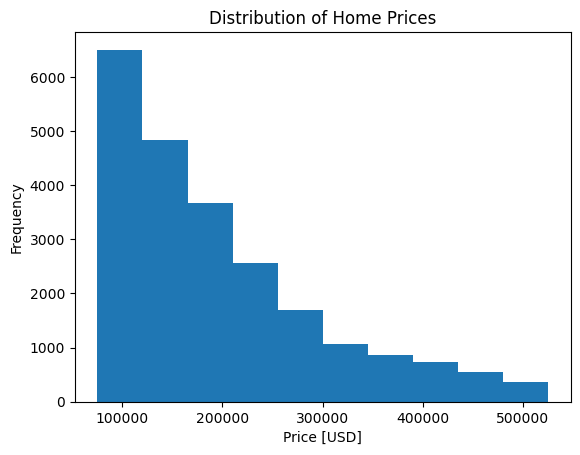

In [17]:
# Histogram of home prices
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")
plt.show()


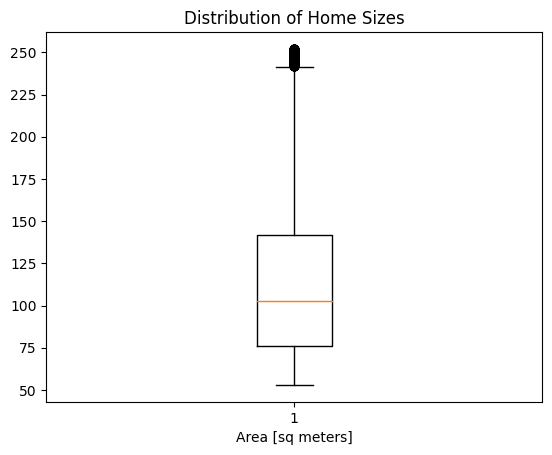

In [18]:
# Boxplot of home sizes
plt.boxplot(df["area_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")
plt.show()

## Regional Analysis 🌍

I analyze mean home prices by region to identify differences:

In [19]:
# Mean price by region
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values()
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

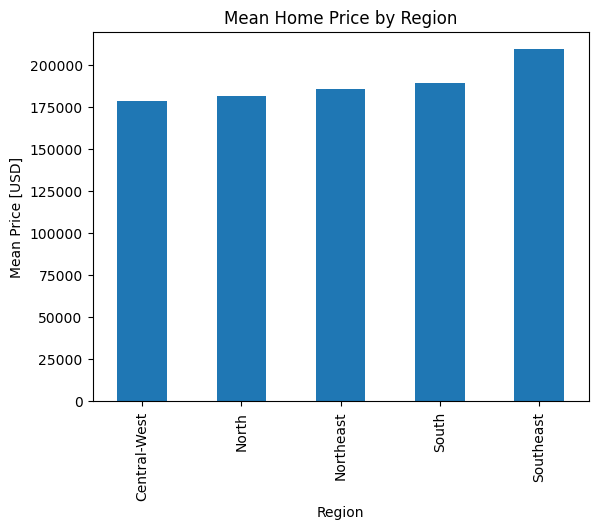

In [20]:
# Bar chart of mean prices
mean_price_by_region.plot(kind="bar", xlabel="Region", ylabel="Mean Price [USD]", title="Mean Home Price by Region")
plt.show()


## Focus on Southern Brazil 🔎
**Exploring the South Region 🏠**

Now I focus on the South region to analyze the relationship between home size and price:

In [21]:
# Filter for South region
df_south = df[df["region"] == "South"]

# Count properties by state
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

## Price vs. Area Relationship 📐

I examine the relationship between home size and price in the state with the most properties:

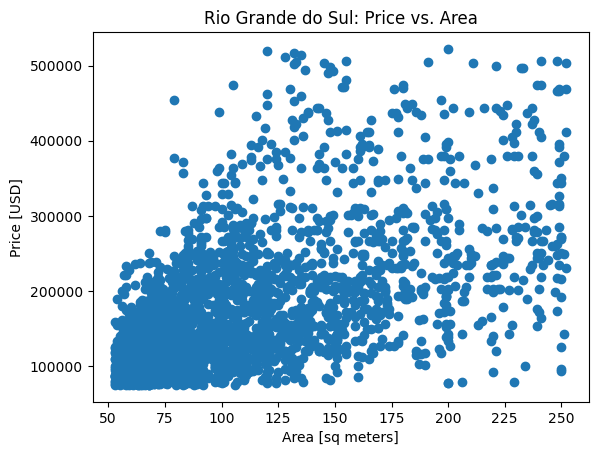

In [22]:
# Subset for Rio Grande do Sul
df_south_space = df_south[df_south["state"] == "Rio Grande do Sul"]

# Scatter plot for Price vs. Area
plt.scatter(x=df_south_space["area_m2"], y=df_south_space["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Rio Grande do Sul: Price vs. Area")
plt.show()


## Correlation Analysis 📊

I calculate the correlation between home size and price for each state in the South:

In [24]:
# Correlation coefficients
south_states_corr = {
    "Rio Grande do Sul": df_south[df_south["state"] == "Rio Grande do Sul"]["area_m2"].corr(df_south[df_south["state"] == "Rio Grande do Sul"]["price_usd"]),
    "Santa Catarina": df_south[df_south["state"] == "Santa Catarina"]["area_m2"].corr(df_south[df_south["state"] == "Santa Catarina"]["price_usd"]),
    "Paraná": df_south[df_south["state"] == "Paraná"]["area_m2"].corr(df_south[df_south["state"] == "Paraná"]["price_usd"])
}
south_states_corr


{'Rio Grande do Sul': 0.5773267433717704,
 'Santa Catarina': 0.5068121776366759,
 'Paraná': 0.543665993550264}

# Conclusion 🎯

In this analysis, I successfully explored the housing market in Brazil, uncovering regional differences in real estate prices and examining the relationship between home size and price in the South. This project demonstrates the power of data visualization and statistical analysis in understanding market trends and regional dynamics. Keep exploring, and let data guide your insights! 🌟